In [4]:
pip install pandas nltk Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install deep-translator

In [7]:
!pip install seaborn

In [8]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string

def select_deskripsi_column(df):
  if 'deskripsi' in df.columns:
        return df[['deskripsi']]
  else:
        raise KeyError("Kolom 'deskripsi' tidak ditemukan di DataFrame.")

In [9]:
df_hotel = pd.read_csv('hotel_bumi_surabaya.csv')
df_hotel = df_hotel.astype(str)
df_hotel = select_deskripsi_column(df_hotel)
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245 entries, 0 to 5244
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deskripsi  5245 non-null   object
dtypes: object(1)
memory usage: 41.1+ KB


In [10]:
df_hotel.head()

,deskripsi
0,Awalnya penasaran dengan hotel ini karena dpt ...
1,"Hotel keren di jantung Kota Surabaya, suasanan..."
2,Pengalaman menginap yang menyenangkan. Hotelny...
3,All the best untuk Hotel ini ... Puas dan Nyam...
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk..."


In [11]:
from deep_translator import GoogleTranslator
import time

# translator instance (dibuat sekali, bukan tiap fungsi)
translator = GoogleTranslator(source='auto', target='id')

# cache biar ga translate ulang
translation_cache = {}

def translate_to_indonesian(text):
    if not isinstance(text, str) or text.strip() == "":
        return text

    if text in translation_cache:
        return translation_cache[text]

    try:
        translated = translator.translate(text)
        translation_cache[text] = translated
        time.sleep(1) 
        return translated
    except Exception as e:
        return text

In [12]:
df_hotel['translated'] = df_hotel['deskripsi'].apply(translate_to_indonesian)

In [13]:
print(df_hotel[['deskripsi', 'translated']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                            translated  
0    Awalnya penasaran dengan hotel ini karena dpt ...  
1    Hotel keren di jantung Kota Surabaya, suasanan...  
2    Pengalaman menginap yang menyenangkan. Hotelny...  
3    All the best untuk Hotel ini ... Puas dan Nyam...  
4    Pelayanan ok,

In [14]:
import re
import string

# Proses filter
def filtering_text(text):
    # Check if text is a string before processing
    if isinstance(text, str):
        # mengubah tweet menjadi huruf kecil
        text = text.lower()
        # menghilangkan url
        text = re.sub(r'https?:\/\/\S+', '', text)
        # menghilangkan mention, link, hashtag
        text = ' '.join(re.sub(r"([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
        # menghilangkan karakter byte (b')
        text = re.sub(r"(b'{1,2})", "", text)
        # menghilangkan yang bukan huruf
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # menghilangkan digit angka
        text = re.sub(r'\d+', '', text)
        # menghilangkan tanda baca
        text = text.translate(str.maketrans('', '', string.punctuation))
        # menghilangkan huruf berulang lebih dari dua kali
        text = re.sub(r'(.)\1{2,}', r'\1', text)
        # menghilangkan whitespace berlebih
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""


In [15]:
df_hotel['filter'] = df_hotel['translated'].apply(filtering_text)

In [16]:
print(df_hotel[['deskripsi', 'translated', 'filter']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                            translated  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayana

In [17]:
def stop_stem(text):
    # stopword
    with open("kamus.txt", "r") as kamus:
        word = kamus.readlines()
        list_stopword = [line.strip() for line in word]
    dictionary = ArrayDictionary(list_stopword)
    stopword = StopWordRemover(dictionary)
    text = stopword.remove(text)
    
    # stemming
    factory_stemmer = StemmerFactory()
    stemmer = factory_stemmer.create_stemmer()
    text = stemmer.stem(text)
    
    return text

df_hotel['cleaned'] = df_hotel['filter'].apply(stop_stem)

In [18]:
print(df_hotel[['deskripsi','filter', 'cleaned']].head(1000))

                                             deskripsi  \
0    Awalnya penasaran dengan hotel ini karena dpt ...   
1    Hotel keren di jantung Kota Surabaya, suasanan...   
2    Pengalaman menginap yang menyenangkan. Hotelny...   
3    All the best untuk Hotel ini ... Puas dan Nyam...   
4    Pelayanan ok, makan juga.\nWalaupun WCnya terk...   
..                                                 ...   
995  We get poolview room, nice, clean amd very com...   
996  Second time in this amazing resort. It is wond...   
997  LOVED THE ROOM AND THE AMBIENCE. THE STAFF WAS...   
998                                                  .   
999  Old hotel but still very well maintained. Room...   

                                                filter  \
0    awalnya penasaran dengan hotel ini karena dpt ...   
1    hotel keren di jantung kota surabaya suasanany...   
2    pengalaman menginap yang menyenangkan hotelnya...   
3    all the best untuk hotel ini puas dan nyaman s...   
4    pelayana

In [19]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_hotel['hotel_tokens'] = df_hotel['cleaned'].apply(word_tokenize_wrapper)

print(df_hotel['hotel_tokens'].head())

[nltk_data] Downloading package punkt to C:\Users\MyBook Hype
[nltk_data]     AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [awal, penasaran, dengan, hotel, karena, dpt, ...
1    [hotel, keren, jantung, kota, surabaya, suasan...
2    [alam, inap, senang, hotel, besar, asri, staff...
3    [all, best, untuk, hotel, puas, nyaman, suka, ...
4    [layan, ok, makan, walaupun, wcnya, kes, lama,...
Name: hotel_tokens, dtype: object


In [20]:
import pandas as pd

# Baca kamus slang
kamus_normalisasi = pd.read_csv("slang.csv")

# Buat dictionary dari kolom 'slang' dan 'formal'
kata_normalisasi_dict = {}

for index, row in kamus_normalisasi.iterrows():
    if row['slang'] not in kata_normalisasi_dict:
        kata_normalisasi_dict[row['slang']] = row['formal']

# Fungsi normalisasi kata berdasarkan dictionary
def normalisasi_kata(document):
    return [kata_normalisasi_dict[term] if term in kata_normalisasi_dict else term for term in document]

# Terapkan ke DataFrame
df_hotel['normalisasi'] = df_hotel['hotel_tokens'].apply(normalisasi_kata)

# Tampilkan hasil
print(df_hotel['normalisasi'].head(10))

0    [awal, penasaran, dengan, hotel, karena, dapat...
1    [hotel, keren, jantung, kota, surabaya, suasan...
2    [alam, inap, senang, hotel, besar, asri, staff...
3    [semua, terbaik, untuk, hotel, puas, nyaman, s...
4    [layan, ok, makan, walaupun, wcnya, kes, lama,...
5    [untuk, cepat, cek, di, luar, biasa, sat, sete...
6    [sudah, langgan, nginep, sini, tiap, surabaya,...
7    [mes, hanya, untuk, satu, malam, untuk, hadir,...
8    [lokasi, strategis, seluruh, staf, sangat, ram...
9    [hotel, nyaman, bagus, untuk, staycation, sama...
Name: normalisasi, dtype: object


In [21]:
!pip install wordcloud

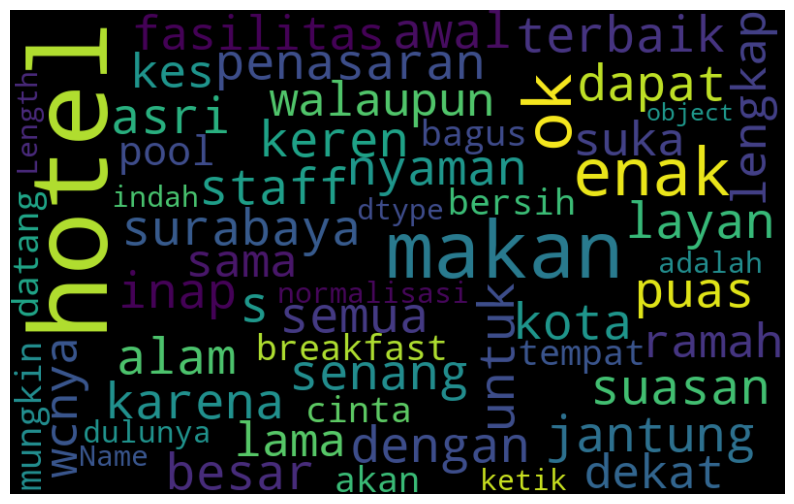

In [22]:
# WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=52, background_color='black',  max_font_size=110).generate(str(df_hotel['normalisasi'].dropna()))

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
!pip install vaderSentiment

In [24]:
#importing and initialising the VADER analyser
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(df_hotel['normalisasi'].shape[0]):
    # Join the list of words into a single string
    text = ' '.join(df_hotel['normalisasi'][i])
    compound = analyzer.polarity_scores(text)["compound"]
    pos = analyzer.polarity_scores(text)["pos"]
    neu = analyzer.polarity_scores(text)["neu"]
    neg = analyzer.polarity_scores(text)["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
df_hotel = df_hotel.join(sentiments_score, rsuffix='_sentiment')
df_hotel

[nltk_data] Downloading package vader_lexicon to C:\Users\MyBook Hype
[nltk_data]     AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,deskripsi,translated,filter,cleaned,hotel_tokens,normalisasi,Compound,Positive,Negative,Neutral
0,Awalnya penasaran dengan hotel ini karena dpt ...,Awalnya penasaran dengan hotel ini karena dpt ...,awalnya penasaran dengan hotel ini karena dpt ...,awal penasaran dengan hotel karena dpt rekomen...,"[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dapat...",0.0000,0.000,0.000,1.000
1,"Hotel keren di jantung Kota Surabaya, suasanan...","Hotel keren di jantung Kota Surabaya, suasanan...",hotel keren di jantung kota surabaya suasanany...,hotel keren jantung kota surabaya suasana asa ...,"[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...",0.2023,0.067,0.000,0.933
2,Pengalaman menginap yang menyenangkan. Hotelny...,Pengalaman menginap yang menyenangkan. Hotelny...,pengalaman menginap yang menyenangkan hotelnya...,alam inap senang hotel besar asri staff ramah ...,"[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...",0.7003,0.070,0.013,0.917
3,All the best untuk Hotel ini ... Puas dan Nyam...,All the best untuk Hotel ini ... Puas dan Nyam...,all the best untuk hotel ini puas dan nyaman s...,all best untuk hotel puas nyaman suka sama seg...,"[all, best, untuk, hotel, puas, nyaman, suka, ...","[semua, terbaik, untuk, hotel, puas, nyaman, s...",0.0000,0.000,0.000,1.000
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk...","Pelayanan ok, makan juga.\nWalaupun WCnya terk...",pelayanan ok makan juga walaupun wcnya terkesa...,layan ok makan walaupun wcnya kes lama cukup b...,"[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...",0.2960,0.056,0.000,0.944
...,...,...,...,...,...,...,...,...,...,...
5240,"Fasilitas lengkap, makanan enak2, ramah dan de...","Fasilitas lengkap, makanan enak2, ramah dan de...",fasilitas lengkap makanan enak ramah dan dekat...,fasilitas lengkap makan enak ramah dekat mana,"[fasilitas, lengkap, makan, enak, ramah, dekat...","[fasilitas, lengkap, makan, enak, ramah, dekat...",0.0000,0.000,0.000,1.000
5241,"Suka banget sama pool nya, breakfast juga ok","Suka banget sama pool nya, breakfast juga ok",suka banget sama pool nya breakfast juga ok,suka sama pool breakfast ok,"[suka, sama, pool, breakfast, ok]","[suka, sama, pool, breakfast, ok]",0.2960,0.355,0.000,0.645
5242,Hotel bersih dan bagus.. makanan enak,Hotel bersih dan bagus.. makanan enak,hotel bersih dan bagus makanan enak,hotel bersih bagus makan enak,"[hotel, bersih, bagus, makan, enak]","[hotel, bersih, bagus, makan, enak]",0.0000,0.000,0.000,1.000
5243,Love this place will come again,Cintai tempat ini akan datang lagi,cintai tempat ini akan datang lagi,cinta tempat akan datang,"[cinta, tempat, akan, datang]","[cinta, tempat, akan, datang]",0.0000,0.000,0.000,1.000


In [25]:
# Set type of polarity
polarity = []

for i in range(len(df_hotel)):
    if (df_hotel['Compound'][i] < 0):
        polarity.append("Negative")
    elif (df_hotel['Compound'][i] > 0):
        polarity.append("Positive")
    else:
        polarity.append("Neutral")

polarity = pd.DataFrame(polarity)
df_hotel['Polarity'] = polarity
df_hotel.head()

,deskripsi,translated,filter,cleaned,hotel_tokens,normalisasi,Compound,Positive,Negative,Neutral,Polarity
0,Awalnya penasaran dengan hotel ini karena dpt ...,Awalnya penasaran dengan hotel ini karena dpt ...,awalnya penasaran dengan hotel ini karena dpt ...,awal penasaran dengan hotel karena dpt rekomen...,"[awal, penasaran, dengan, hotel, karena, dpt, ...","[awal, penasaran, dengan, hotel, karena, dapat...",0.0000,0.000,0.000,1.000,Neutral
1,"Hotel keren di jantung Kota Surabaya, suasanan...","Hotel keren di jantung Kota Surabaya, suasanan...",hotel keren di jantung kota surabaya suasanany...,hotel keren jantung kota surabaya suasana asa ...,"[hotel, keren, jantung, kota, surabaya, suasan...","[hotel, keren, jantung, kota, surabaya, suasan...",0.2023,0.067,0.000,0.933,Positive
2,Pengalaman menginap yang menyenangkan. Hotelny...,Pengalaman menginap yang menyenangkan. Hotelny...,pengalaman menginap yang menyenangkan hotelnya...,alam inap senang hotel besar asri staff ramah ...,"[alam, inap, senang, hotel, besar, asri, staff...","[alam, inap, senang, hotel, besar, asri, staff...",0.7003,0.070,0.013,0.917,Positive
3,All the best untuk Hotel ini ... Puas dan Nyam...,All the best untuk Hotel ini ... Puas dan Nyam...,all the best untuk hotel ini puas dan nyaman s...,all best untuk hotel puas nyaman suka sama seg...,"[all, best, untuk, hotel, puas, nyaman, suka, ...","[semua, terbaik, untuk, hotel, puas, nyaman, s...",0.0000,0.000,0.000,1.000,Neutral
4,"Pelayanan ok, makan juga.\nWalaupun WCnya terk...","Pelayanan ok, makan juga.\nWalaupun WCnya terk...",pelayanan ok makan juga walaupun wcnya terkesa...,layan ok makan walaupun wcnya kes lama cukup b...,"[layan, ok, makan, walaupun, wcnya, kes, lama,...","[layan, ok, makan, walaupun, wcnya, kes, lama,...",0.2960,0.056,0.000,0.944,Positive


In [26]:
df_hotel['Polarity'].value_counts()

Polarity
Neutral     4638
Positive     513
Negative      94
Name: count, dtype: int64

<Axes: xlabel='Polarity'>

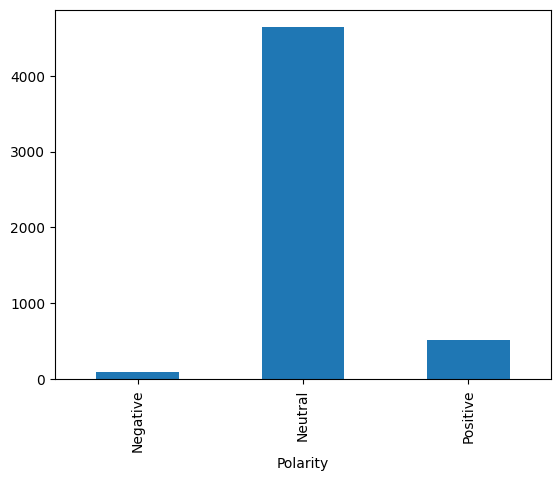

In [27]:
df_hotel.groupby('Polarity').size().plot(kind='bar')

In [47]:
i= 1
print("Raw review : ",df_hotel.deskripsi[i])
print("\nTraslate review : ",df_hotel.translated[i])
print("\nCleaned review : ",df_hotel.cleaned[i])
print("\nVADER Polarity scores : ",df_hotel.Polarity[i])
print("\nCompound Sentiment : ",df_hotel.Compound[i])

Raw review :  Hotel keren di jantung Kota Surabaya, suasananya terasa seperti tidak berada ditengah Kota surabaya, lebih seperti berada di Bali. Makanannya enak2, staf, satpam dan ob semuanya ramah, recommended banget dah

Traslate review :  Hotel keren di jantung Kota Surabaya, suasananya terasa seperti tidak berada ditengah Kota surabaya, lebih seperti berada di Bali. Makanannya enak2, staf, satpam dan ob semuanya ramah, recommended banget dah

Cleaned review :  hotel keren jantung kota surabaya suasana asa seperti tidak ada tengah kota surabaya lebih seperti ada bal makan enak staf satpam ob semua ramah recommended dah

VADER Polarity scores :  Positive

Compound Sentiment :  0.2023


In [48]:
!pip install scikit-learn

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Gabungkan list kata menjadi string
df_hotel['normalisasi_str'] = df_hotel['normalisasi'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

# Vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_hotel['normalisasi_str'])

# Model LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Fungsi untuk menampilkan topik
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topik {topic_idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("")

# Menampilkan topik
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names)


Topik 1:
tidak | ada | kamar | untuk | kurang | dalam | makan | hotel | hanya | jadi

Topik 2:
sangat | hotel | untuk | tinggal | luar | akan | biasa | adalah | staf | tidak

Topik 3:
hotel | kamar | tidak | dengan | tapi | bersih | tua | enak | bagus | fasilitas

Topik 4:
hotel | kamar | surabaya | banyak | selalu | dengan | bersih | inap | luas | perlu

Topik 5:
sangat | bagus | hotel | dengan | kamar | untuk | sarap | staf | besar | lokasi



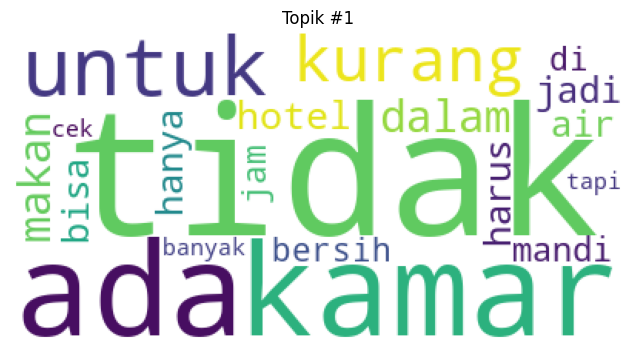

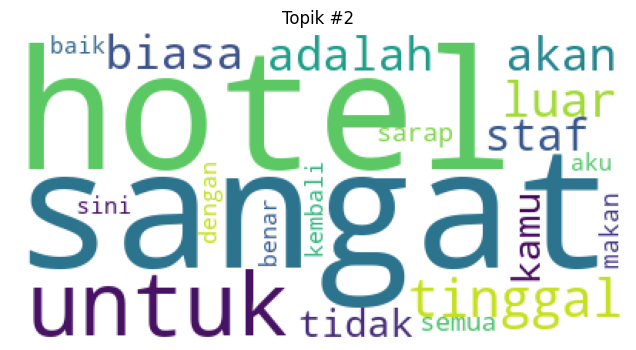

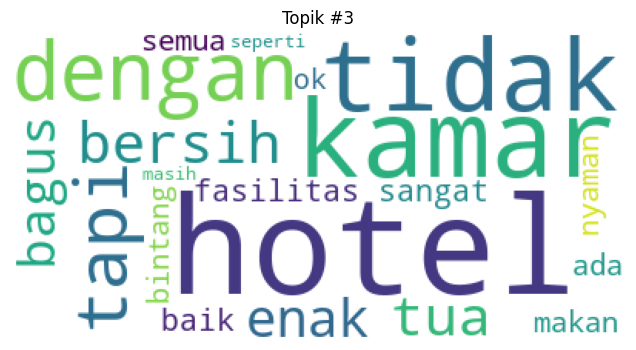

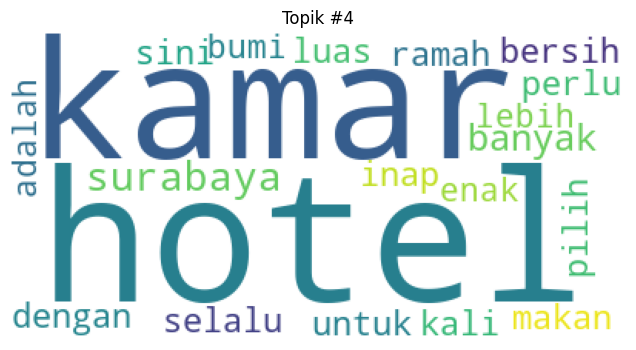

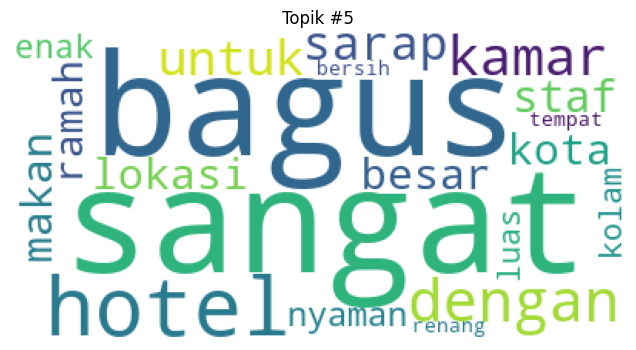

In [51]:
# WordCloud per topik
for t in range(lda.n_components):
    plt.figure(figsize=(8, 4))

    topic_words = dict(zip(vectorizer.get_feature_names_out(), lda.components_[t]))

    top_words = dict(sorted(topic_words.items(), key=lambda item: item[1], reverse=True)[:20])

    plt.imshow(WordCloud(background_color='white').fit_words(top_words))
    plt.axis("off")
    plt.title(f"Topik #{t+1}")
    plt.show()

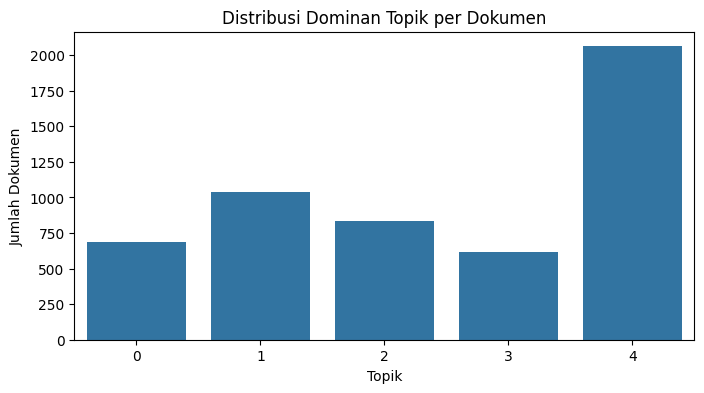

In [52]:
# Distribusi topik
topic_distribution = lda.transform(X)
dominant_topic = [topic_distribution[i].argmax() for i in range(topic_distribution.shape[0])]
df_hotel['dominant_topic'] = dominant_topic

plt.figure(figsize=(8, 4))
sns.countplot(data=df_hotel, x='dominant_topic')
plt.title("Distribusi Dominan Topik per Dokumen")
plt.xlabel("Topik")
plt.ylabel("Jumlah Dokumen")
plt.show()

In [53]:
# Kata-kata top per topik (opsional)
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    print(f"Topik {i+1}: " + ", ".join(top_words))

Topik 1: tidak, ada, kamar, untuk, kurang, dalam, makan, hotel, hanya, jadi
Topik 2: sangat, hotel, untuk, tinggal, luar, akan, biasa, adalah, staf, tidak
Topik 3: hotel, kamar, tidak, dengan, tapi, bersih, tua, enak, bagus, fasilitas
Topik 4: hotel, kamar, surabaya, banyak, selalu, dengan, bersih, inap, luas, perlu
Topik 5: sangat, bagus, hotel, dengan, kamar, untuk, sarap, staf, besar, lokasi


In [79]:
from scipy.stats import f_oneway
import numpy as np

# Dominant topic untuk setiap ulasan
def get_dominant_topic(doc_bow):
    topic_distribution = lda.transform(doc_bow)
    dominant_topic = np.argmax(topic_distribution[0])
    return dominant_topic

X_list = [X[i] for i in range(X.shape[0])]
df_hotel['dominant_topic'] = [get_dominant_topic(doc) for doc in X_list]
df_hotel['panjang_ulasan'] = df_hotel['normalisasi_str'].apply(lambda x: len(x.split()))

# Kelompokkan dan lakukan ANOVA
grouped = [group['panjang_ulasan'].values for _, group in df_hotel.groupby('dominant_topic')]
f_stat, p_val = f_oneway(*grouped)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")


F-statistic: 59.5952
P-value: 0.0000


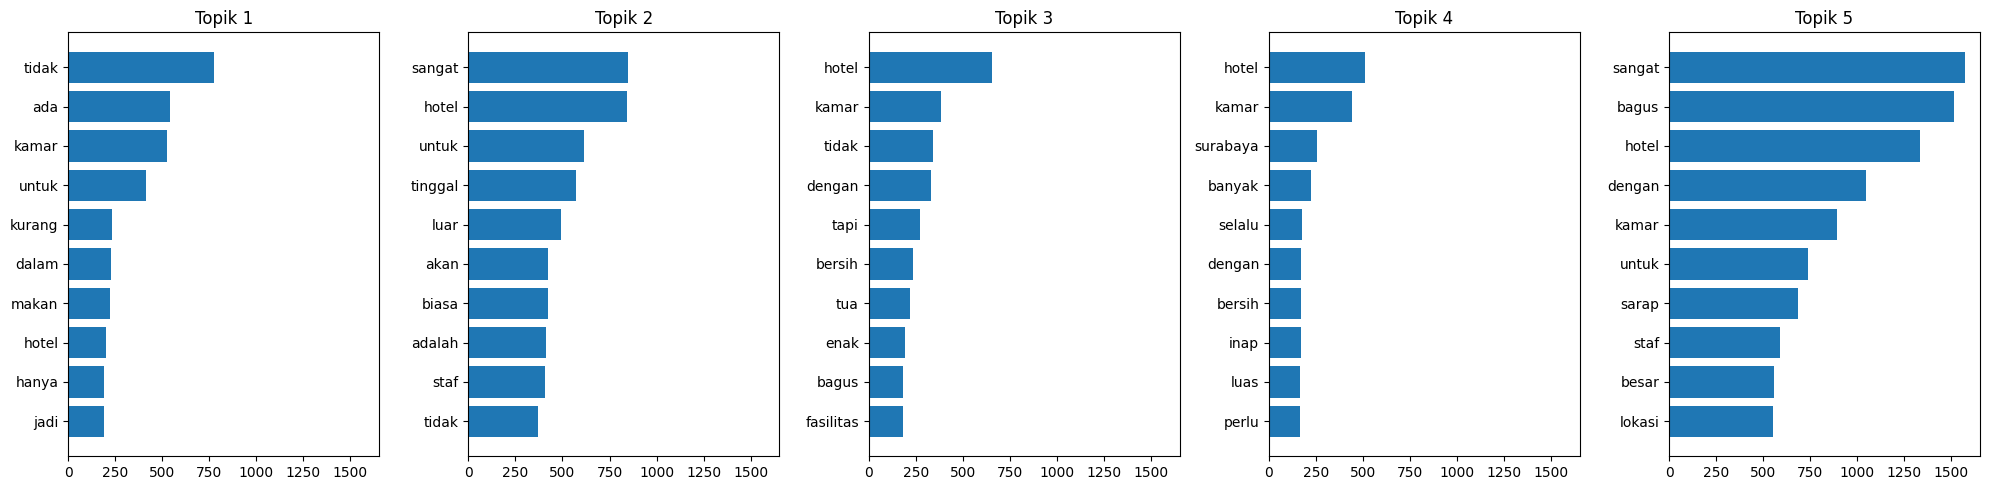

In [80]:

# Visualisasi topik dan kata-kata utamanya
def plot_top_words(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(1, model.n_components, figsize=(20, 5), sharex=True)
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights)
        ax.set_title(f'Topik {topic_idx + 1}')
        ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_top_words(lda, tf_feature_names)
